<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part8/P8_Ch02_CH01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 세그멘테이션 - 인물 사진에서 배경 없애기
- 작게 줄인 PFCN 데이터를 이용하여 사람 영역 추출
- 큰 사진을 작게 줄이기
- 이미지에 대한 오토인코더식 접근 방법

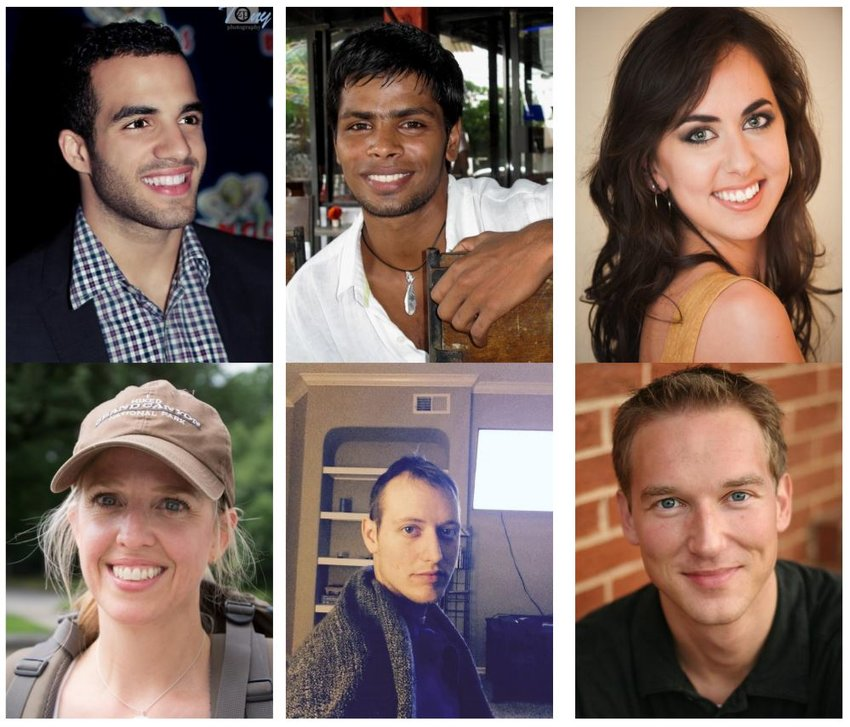
- 800x600의 사람 portrait 이미지  
 - ?????.png  
- 사람 영역에 대한 흑백 portrait 이미지
 - ?????_matte.png
- pfcn_original
 - 원본 800x600 이미지들
- pfcn_small
 - colab용 100x75 이미지들



In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

## EDA

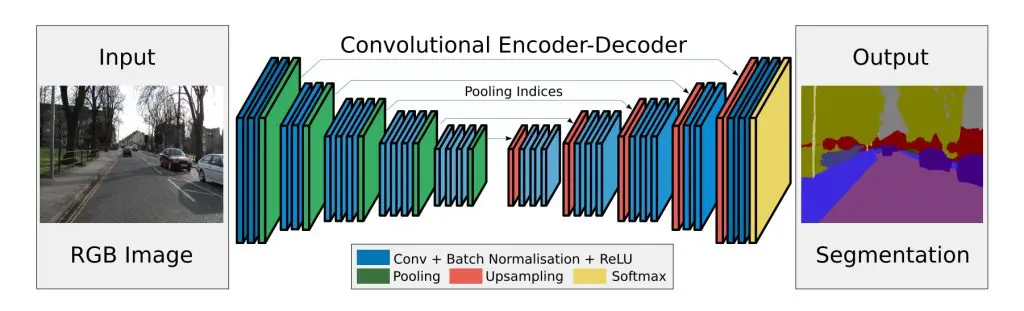

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount= True)

Mounted at /gdrive


In [5]:
import glob
import imageio
from skimage.transform import resize

In [7]:
pfcn_small =np.load('/gdrive/MyDrive/딥러닝_정주행/P8_Ch02.인물사진에서배경없애기/pfcn_small.npz')

In [11]:
train_images = pfcn_small['train_images']
train_mattes = pfcn_small['train_mattes']
test_images = pfcn_small['test_images']
test_mattes = pfcn_small['test_mattes']


In [13]:
train_images[train_images !=0][:10]

array([0.23627451, 0.34803922, 0.64705882, 0.24509804, 0.35686275,
       0.65588235, 0.25490196, 0.36470588, 0.66470588, 0.2372549 ])

In [19]:
train_images.shape, train_mattes.shape

((1700, 100, 75, 3), (1700, 100, 75))

In [15]:
train_images.dtype

dtype('float64')

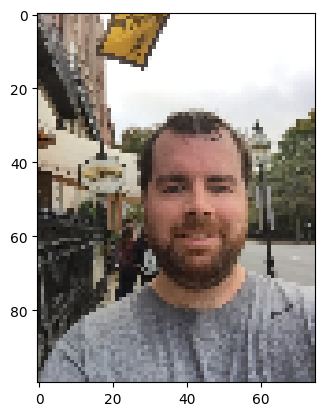

In [20]:
plt.imshow(train_images[1])
plt.show()

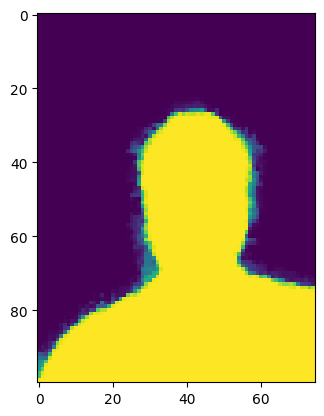

In [21]:
plt.imshow(train_mattes[1])
plt.show()